In [1]:
from IPython.display import Image
Image(url= "Anemia.jpg")

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
import os

plt.style.use("seaborn-v0_8-darkgrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

---

<a id="1"></a>
# Load an Check Data

We loaded the data.

In [2]:
data = pd.read_csv("CBC.csv")

In [3]:
data.head(5)

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S. No.     364 non-null    float64
 1   Age        364 non-null    float64
 2   Sex        364 non-null    float64
 3     RBC      365 non-null    object 
 4   PCV        365 non-null    object 
 5   MCV        365 non-null    object 
 6   MCH        365 non-null    object 
 7    MCHC      364 non-null    float64
 8    RDW       365 non-null    object 
 9   TLC        365 non-null    object 
 10   PLT /mm3  365 non-null    object 
 11   HGB       365 non-null    object 
dtypes: float64(4), object(8)
memory usage: 35.2+ KB


In [5]:
data.describe()

,S. No.,Age,Sex,MCHC
count,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,32.053407
std,105.221988,18.780854,0.497344,2.801790
min,1.000000,11.000000,0.000000,23.600000
25%,91.750000,28.000000,0.000000,30.300000
50%,182.500000,44.500000,0.000000,31.700000
75%,273.250000,60.000000,1.000000,33.300000
max,364.000000,89.000000,1.000000,50.200000


---

<a id="2"></a>
# Manipulate the Data

<a id="2"></a>
## Correcting Column Names
Here we use the strip method to get rid of the spaces at the beginning and end of the names in the columns. We also fix the spaces manually.

In [6]:
data = data.copy()

In [7]:
print(data.columns)

Index(['S. No.', 'Age      ', 'Sex  ', '  RBC    ', 'PCV', 'MCV  ', 'MCH',
       ' MCHC  ', ' RDW    ', 'TLC', ' PLT /mm3', ' HGB '],
      dtype='object')


In [8]:
data.columns = data.columns.str.replace(' ', '')
print(data.columns)

Index(['S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB'],
      dtype='object')


---

<a id="4"></a>
## Extracting from the Data


Extract data from our data frame that is not directly related to the disease.In order to use the ranges of disease blood values, we need to use only the appropriate data, so we need to update our data.

In [9]:
filtered_data = data.dropna(ignore_index=True)
data=filtered_data.copy()

In [10]:
filtered_data.describe()

,S.No.,Age,Sex,MCHC
count,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,32.053407
std,105.221988,18.780854,0.497344,2.801790
min,1.000000,11.000000,0.000000,23.600000
25%,91.750000,28.000000,0.000000,30.300000
50%,182.500000,44.500000,0.000000,31.700000
75%,273.250000,60.000000,1.000000,33.300000
max,364.000000,89.000000,1.000000,50.200000


In [11]:
filtered_data.Age[filtered_data.Age<18]

7      14.0
8      16.0
38     14.0
56     15.0
57     13.0
60     15.0
61     13.0
66     14.0
69     13.0
70     13.0
72     17.0
83     17.0
121    15.0
128    11.0
137    16.0
151    14.0
161    13.0
172    17.0
181    12.0
198    16.0
212    16.0
216    16.0
280    14.0
294    14.0
327    14.0
359    17.0
Name: Age, dtype: float64

The test we use only works with adults. And the number of children is not that high, so we can extract from the data.

All data size.

In [12]:
len(filtered_data)

364

We extract patients who are less than 18 years old.

In [13]:
data.drop(filtered_data[filtered_data['Age'] < 18].index,inplace=True)
filtered_data.drop(filtered_data[filtered_data['Age'] < 18].index,inplace=True)
filtered_data.reset_index(inplace=True)
data.reset_index(inplace=True)

Extracted data size.

In [14]:
len(filtered_data)

338

---

<a id="3"></a>
## Changing Data Type


In [15]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    338 non-null    int64  
 1   S.No.    338 non-null    float64
 2   Age      338 non-null    float64
 3   Sex      338 non-null    float64
 4   RBC      338 non-null    object 
 5   PCV      338 non-null    object 
 6   MCV      338 non-null    object 
 7   MCH      338 non-null    object 
 8   MCHC     338 non-null    float64
 9   RDW      338 non-null    object 
 10  TLC      338 non-null    object 
 11  PLT/mm3  338 non-null    object 
 12  HGB      338 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 34.5+ KB


Here we change the data type of the data frame to float.

In [16]:
filtered_data = filtered_data.astype("float64")

In [17]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    338 non-null    float64
 1   S.No.    338 non-null    float64
 2   Age      338 non-null    float64
 3   Sex      338 non-null    float64
 4   RBC      338 non-null    float64
 5   PCV      338 non-null    float64
 6   MCV      338 non-null    float64
 7   MCH      338 non-null    float64
 8   MCHC     338 non-null    float64
 9   RDW      338 non-null    float64
 10  TLC      338 non-null    float64
 11  PLT/mm3  338 non-null    float64
 12  HGB      338 non-null    float64
dtypes: float64(13)
memory usage: 34.5 KB


---

<a id="5"></a>
## Grouping the Data
Here we divide our features according to this site
https://www.compsim.com/demos/d60/Anemia.htm

In [18]:
filtered_data.columns

Index(['index', 'S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC',
       'RDW', 'TLC', 'PLT/mm3', 'HGB'],
      dtype='object')

<a id="10"></a>
### Setting the Scale Gaps of Features.

In [19]:
filtered_data["HGB"]=[(2 if filtered_data["HGB"][item] >15 else 0 if filtered_data["HGB"][item] < 12 else 1) if filtered_data["Sex"][item] == 0.0 else (2 if filtered_data["HGB"][item] >14 else 0 if filtered_data["HGB"][item] < 11 else 1) for item in range(len(filtered_data))]

In [20]:
filtered_data["PCV"]=[(2 if filtered_data["PCV"][item] >48.6 else 0 if filtered_data["PCV"][item] < 38.3 else 1) if filtered_data["Sex"][item] == 0.0 else (2 if filtered_data["PCV"][item] >44.9 else 0 if filtered_data["PCV"][item] < 35.5 else 1) for item in range(len(filtered_data))]

In [21]:
filtered_data["MCHC"]=[2 if item >38 else 0 if item < 30 else 1 for item in filtered_data["MCHC"]]

In [22]:
filtered_data["MCH"]=[2 if item >35 else 0 if item < 25 else 1 for item in filtered_data["MCH"]]

In [23]:
filtered_data["RDW"]=[2 if item >16 else 0 if item < 12.5 else 1 for item in filtered_data["RDW"]]

In [24]:
filtered_data["PLT/mm3"]=[2 if item >450 else 0 if item < 140 else 1 for item in filtered_data["PLT/mm3"]]

In [25]:
filtered_data["RBC"]=[2 if item >5.8 else 0 if item < 4 else 1 for item in filtered_data["RBC"]]

In [26]:
filtered_data["MCV"]=[2 if item >115 else 0 if item < 75 else 1 for item in filtered_data["MCV"]]

In [27]:
filtered_data["TLC"]=[2 if item >11 else 0 if item < 3 else 1 for item in filtered_data["TLC"]]

In [28]:
filtered_data["Age"]=[3 if item >64 else 2 if item > 48 else 1 if item>32 else 0 for item in filtered_data["Age"]]

Extract data from our data frame that is not directly related to the disease.

In [29]:
filtered_data2=filtered_data.drop(["Age","Sex","S.No.","index"],axis=1,inplace=False)

In [30]:
filtered_data2.head()

,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB
0,1,0,0,0,0,2,2,0,0
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,2,1,0
4,1,1,1,1,1,1,1,1,1


We use this function to diagnose patients according to the above intervals.

In [31]:
def find_diagnose(feature):
    filtered_data2["diseased"]=[1 if filtered_data2[feature][item] == 0 or filtered_data2[feature][item] == 2 else filtered_data2["diseased"][item] for item in range(len(filtered_data2))]


In [32]:
filtered_data2["diseased"] = 0
for item in filtered_data2.columns:
    if(item!="diseased"):
        find_diagnose(item)

---

<a id="6"></a>
# Plotting

We added the newly found disease feature to our previous data to make a graph and examine our values.

In [33]:
data["diseased"]=filtered_data2["diseased"]
filtered_data["diseased"]=filtered_data2["diseased"]
data = data.astype("float64")

In [34]:
data.head()

,index,S.No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT/mm3,HGB,diseased
0,0.0,1.0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,1.0
1,1.0,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,0.0
2,2.0,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,0.0
3,3.0,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,1.0
4,4.0,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,0.0


In [35]:
corr=data.corr().drop(['S.No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC',
       'PLT/mm3', 'HGB'],axis=1)
corr=corr.drop(["diseased",'S.No.'],axis=0)

In [36]:
corr.head(corr.size)

,index,diseased
index,1.000000,0.007529
Age,-0.001488,0.175140
Sex,0.106251,0.071761
RBC,-0.008885,-0.219272
PCV,0.006406,-0.323698
MCV,-0.012648,-0.078948
MCH,0.150259,-0.037811
MCHC,0.197904,0.047310
RDW,-0.124502,0.292969
TLC,0.024247,0.165078


Effects of feature's on disease.

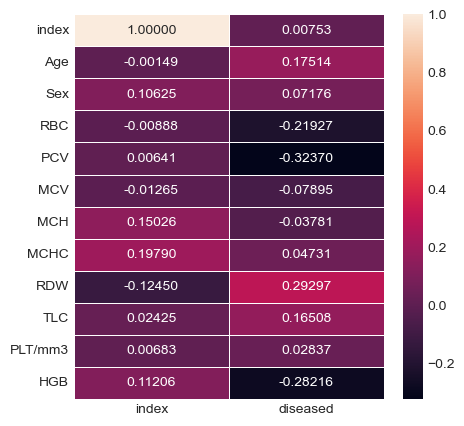

In [37]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.5f',ax=ax,)
plt.show()

Effects of feature's on each other.

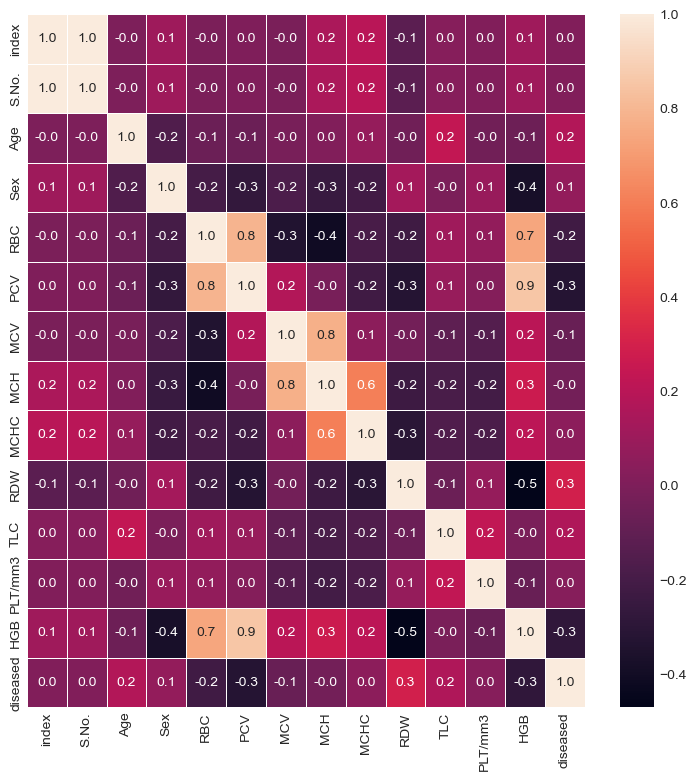

In [38]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()

In [39]:
def scatter_plot(names):
    plt.scatter(data[names[0]][data["diseased"]==1],data[names[1]][data["diseased"]==1],color="red",alpha=0.5,label="diseased")
    plt.scatter(data[names[0]][data["diseased"]==0],data[names[1]][data["diseased"]==0],color="blue",alpha=0.6,label="not diseased")
    plt.xlabel(names[0])
    plt.ylabel(names[1])
    plt.legend()

The graphs in which we examine in which intervals the most relevant featurettes are diseased or not. 

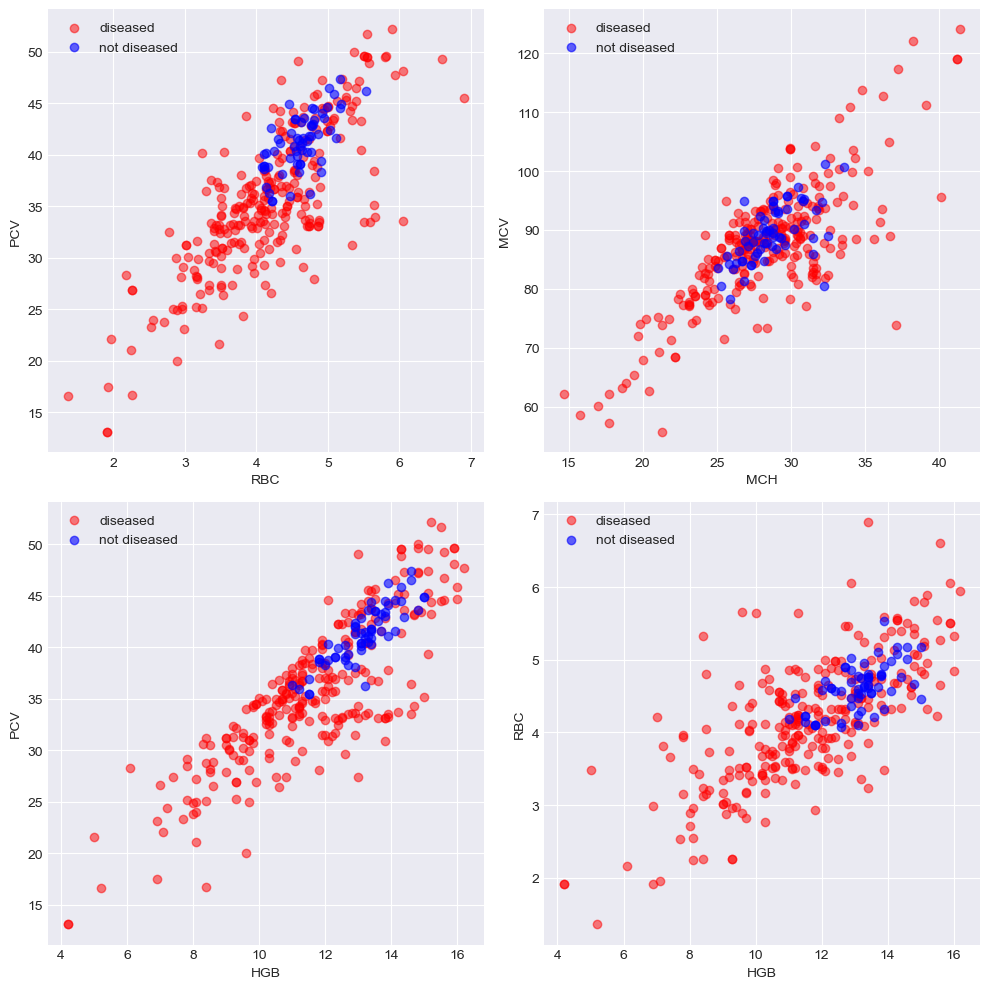

In [40]:
plt.subplots(figsize=(10, 10))
plt.subplot(2, 2, 1)
scatter_plot(["RBC","PCV"])
plt.subplot(2, 2, 2)
scatter_plot(["MCH","MCV"])
plt.subplot(2, 2, 3)
scatter_plot(["HGB","PCV"])
plt.subplot(2, 2, 4)
scatter_plot(["HGB","RBC"])
plt.tight_layout()
plt.show()

Disease graph separated according to age groups.

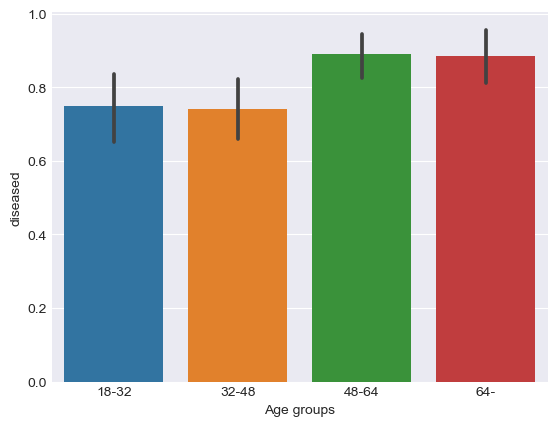

In [41]:
sns.barplot(filtered_data,x="Age",y="diseased")
plt.xticks(ticks=(0,1,2,3),labels=("18-32","32-48","48-64","64-"))
plt.xlabel("Age groups")
plt.ylabel("diseased")
plt.show()

Disease graph separated according to sex.

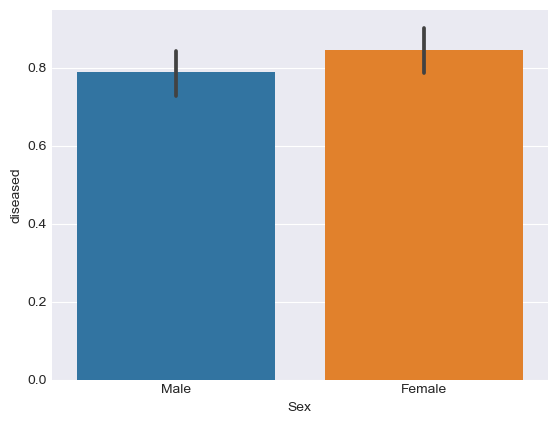

In [42]:
sns.barplot(data,x="Sex",y="diseased")
plt.xticks(ticks=(0,1),labels=("Male","Female"))
plt.xlabel("Sex")
plt.ylabel("diseased")
plt.show()

Percentages of anemia types by sex.

In [43]:
female_mild_anemia=filtered_data[(filtered_data.Sex==1.0) & (filtered_data.HGB==0)][filtered_data.columns[0]].count()
female_normal_anemia=filtered_data[(filtered_data.Sex==1.0) & (filtered_data.HGB==1)][filtered_data.columns[0]].count()
female_anemia=filtered_data[filtered_data.Sex==1.0]["S.No."].count()

print("when sex is female")
print("mild anemia count is :",female_mild_anemia)
print("normal anemia count is :",female_normal_anemia)
print("mild anemia count is :",female_mild_anemia/female_anemia)

when sex is female
mild anemia count is : 68
normal anemia count is : 82
mild anemia count is : 0.44155844155844154


In [44]:
male_mild_anemia=filtered_data[(filtered_data.Sex==0.0) & (filtered_data.HGB==0)][filtered_data.columns[0]].count()
male_normal_anemia=filtered_data[(filtered_data.Sex==0.0) & (filtered_data.HGB==1)][filtered_data.columns[0]].count()
male_anemia=filtered_data[filtered_data.Sex==0.0]["S.No."].count()

print("when sex is male")
print("mild anemia count is :",male_mild_anemia)
print("normal anemia count is :",male_normal_anemia)
print("mild anemia count is :",male_mild_anemia/male_anemia)

when sex is male
mild anemia count is : 54
normal anemia count is : 112
mild anemia count is : 0.29347826086956524


---

<a id="7"></a>
# Creating Model and Testing

<a id="8"></a>
## Creating Train and Test Data

In [45]:
y = filtered_data2.diseased

In [46]:
x = filtered_data2.drop(["diseased"],axis=1)

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((236, 9), (102, 9), (236,), (102,))

---

<a id="9"></a>
## Testing the Model

Testing data using Random Forest

In [49]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print("%",r2_score(y_test,y_pred)*100)

% 100.0


We are using Confuison Matrix to plot are Random Forest predictions.

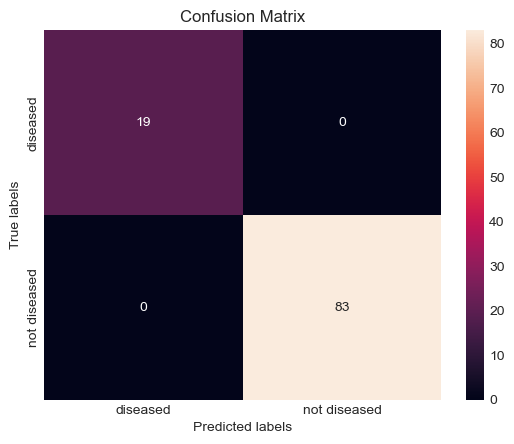

In [50]:
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['diseased','not diseased']); ax.yaxis.set_ticklabels(['diseased','not diseased']);

Testing data using KNN.

In [51]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("%",r2_score(y_test,y_pred)*100)

% 100.0


We are using Confuison Matrix to plot are KNN predictions.

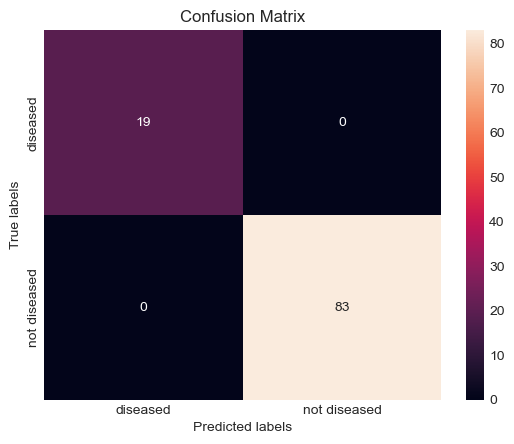

In [52]:
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['diseased','not diseased']); ax.yaxis.set_ticklabels(['diseased','not diseased']);